In [32]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=750, n_features=2, center_box=(0, 24), random_state=0)

In [33]:
print("Dataset Size: ", x.shape)
print("Sample Rows: ")
print(x[:5])

Dataset Size:  (750, 2)
Sample Rows: 
[[15.23901586 11.4155981 ]
 [13.03864352 16.86675391]
 [13.43367792 12.64044805]
 [14.26792213 13.17138869]
 [ 9.76615764 15.03298267]]


In [34]:
import warnings
warnings.filterwarnings("ignore")

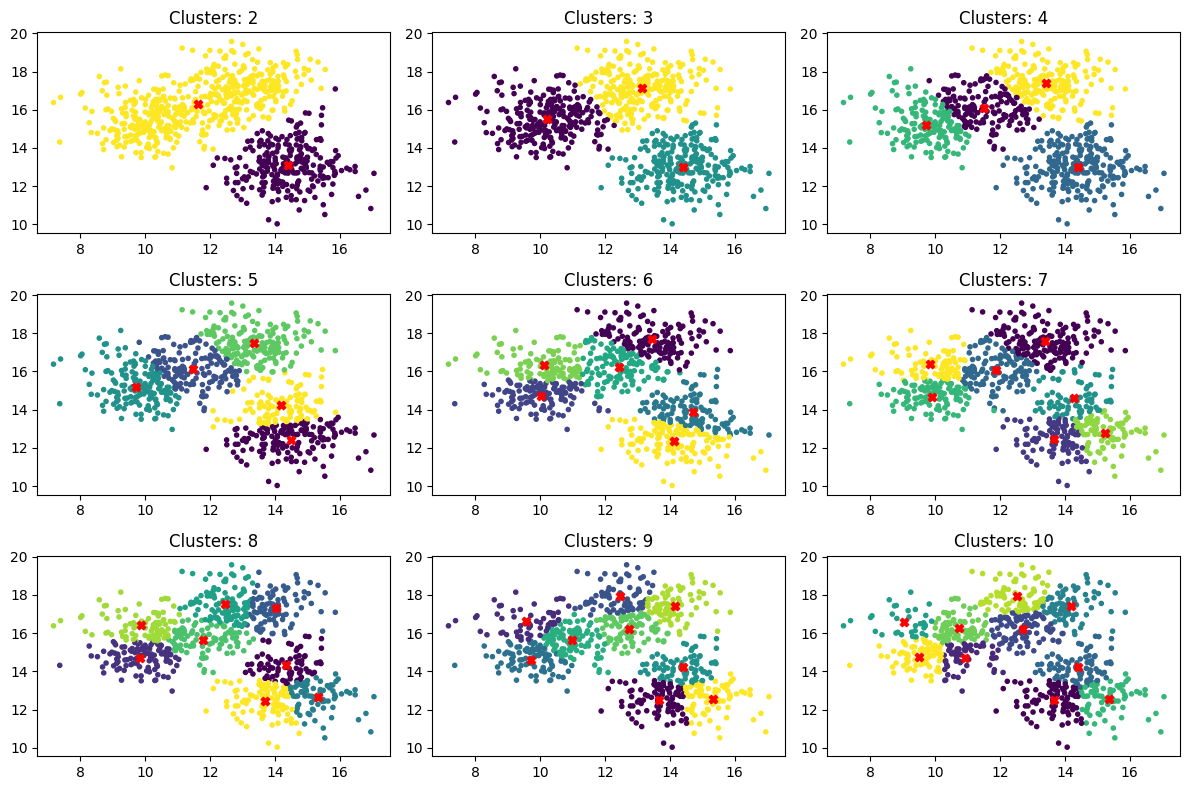

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(2, 11)
plt.figure(figsize = (12,8))

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state = 14)
    kmeans.fit(x)
    plt.subplot(3,3, n_clusters-1)
    plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, cmap='viridis', marker='.')
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c='red', marker='X')
    plt.title(f'Clusters: {n_clusters}')

plt.tight_layout()
plt.show()

In [36]:
import numpy as np
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters = n_clusters, random_state=14)
    kmeans.fit(x)
    print(f'Number of smaples in each clusters for {n_clusters} clusters: ', np.bincount(kmeans.labels_))

Number of smaples in each clusters for 2 clusters:  [256 494]
Number of smaples in each clusters for 3 clusters:  [252 249 249]
Number of smaples in each clusters for 4 clusters:  [150 249 158 193]
Number of smaples in each clusters for 5 clusters:  [156 145 159 181 109]
Number of smaples in each clusters for 6 clusters:  [144 119 119 122 110 136]
Number of smaples in each clusters for 7 clusters:  [164  99 123  78 109  90  87]
Number of smaples in each clusters for 8 clusters:  [ 81 106  95  78 111  94  86  99]
Number of smaples in each clusters for 9 clusters:  [ 97  58  79  90  82 101  88  80  75]
Number of smaples in each clusters for 10 clusters:  [97 57 94 84 77 34 73 82 78 74]


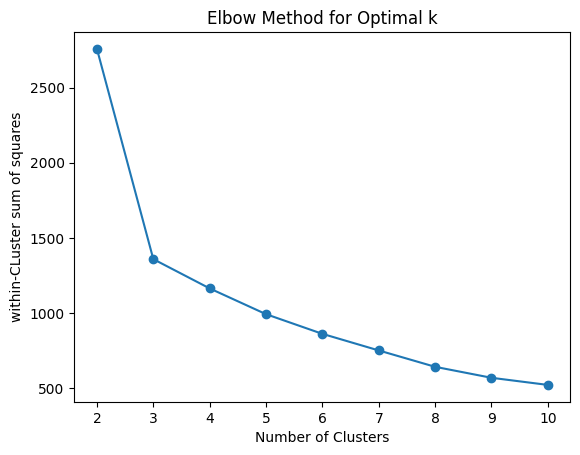

In [37]:
inertia = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state = 14)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("within-CLuster sum of squares")
plt.title("Elbow Method for Optimal k")
plt.show()

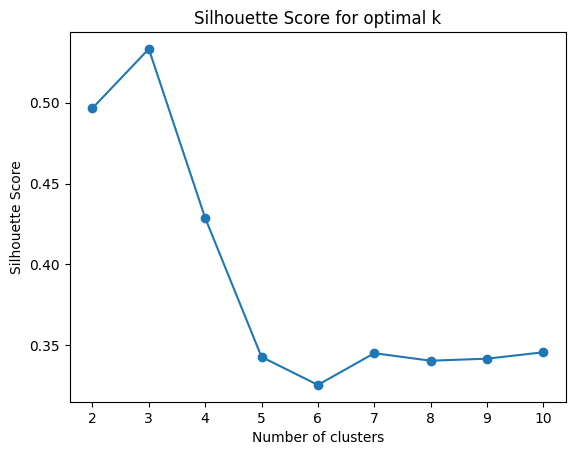

In [38]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=14)
    kmeans.fit(x)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))
    
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score for optimal k")
plt.show()

In [39]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=None)
birch.fit(x)

Birch(n_clusters=None)

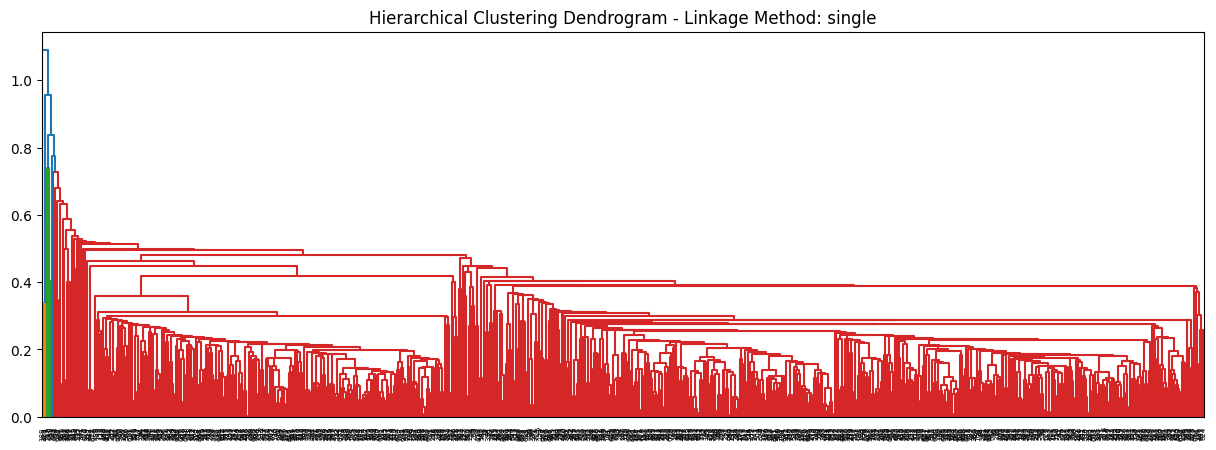

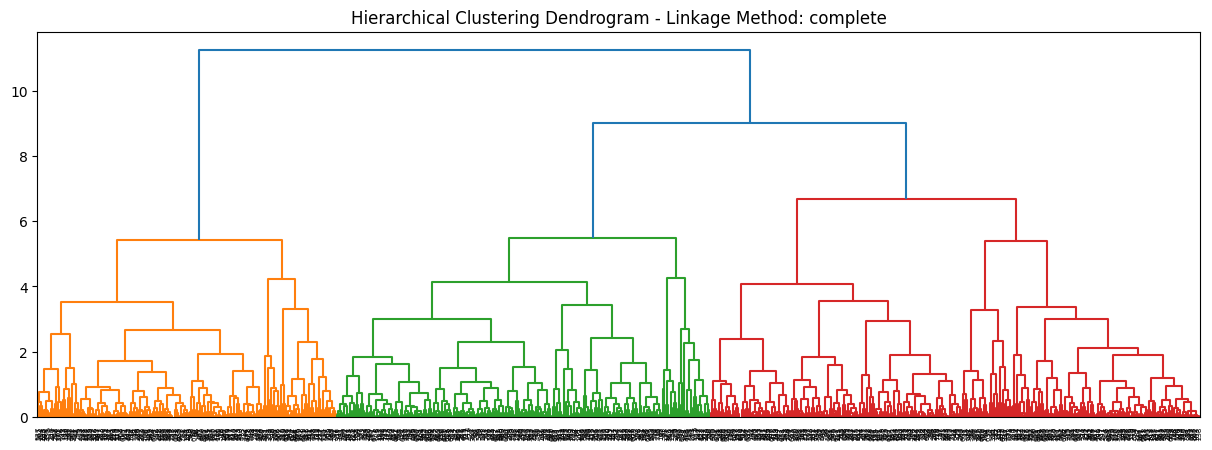

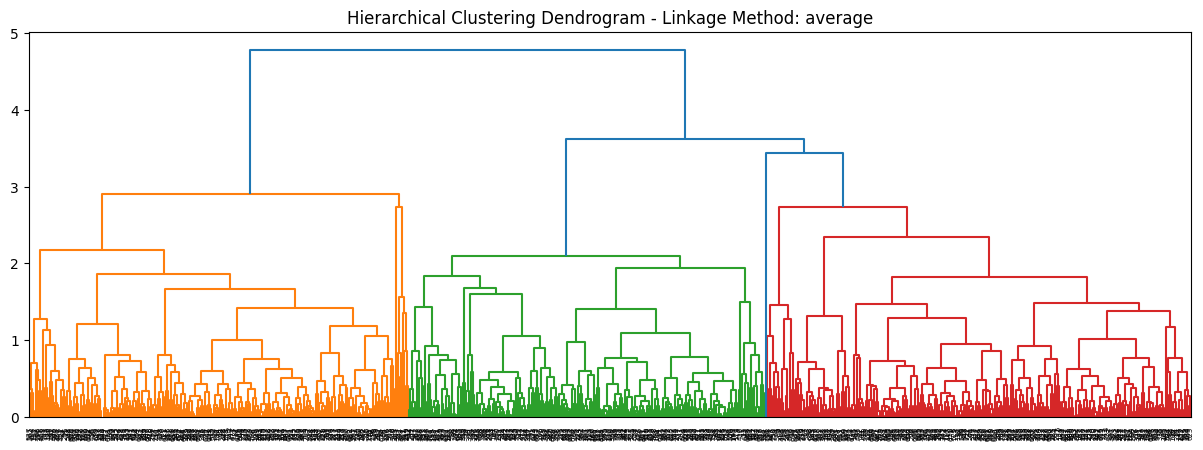

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_methods = ['single','complete','average']

for method in linkage_methods:
    z = linkage(x, method=method)
    plt.figure(figsize=(15,5))
    dendrogram(z)
    plt.title(f'Hierarchical Clustering Dendrogram - Linkage Method: {method}')
    plt.show()

In [41]:
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=3, random_state=14)
kmeans_labels = kmeans.fit_predict(x)

birch_labels = birch.predict(x)

ari_kmeans = adjusted_rand_score(labels_true=y, labels_pred=kmeans_labels)
ari_birch = adjusted_rand_score(labels_true=y, labels_pred=birch_labels)

print("Adjusted Random Index for KMeans: ", ari_kmeans)
print("Adjusted Random Index for Birch: ", ari_birch)


Adjusted Random Index for KMeans:  0.8991956402215038
Adjusted Random Index for Birch:  0.10240864713611628


In [42]:
import numpy as np

def perceptron(input_values, weights):
    summation = np.dot(input_values, weights[1:]) + weights[0]
    return 1 if summation > 0 else 0

inputs = np.array([[0,0], [0,1], [1,0], [1,1]])

#AND
weights_and = np.array([-0.5, 1.5, 0.5])
print("AND Operations")
for input_values in inputs:
    output = perceptron(input_values, weights_and)
    
    print(f'Input: {input_values}, Output: {output}')
    
#OR
weights_or = np.array([-0.5, 1.5, 1])
print("OR Operations")
for input_values in inputs:
    output = perceptron(input_values, weights_or)
    print(f'Input: {input_values}, Output: {output}')
    
#XOR
weights_xor = np.array([-0.5, 1, 1])
print("XOR Operations")
for input_values in inputs:
    output = perceptron(input_values, weights_xor)    
    print(f'Input: {input_values}, Output: {output}')

AND Operations
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 1
Input: [1 1], Output: 1
OR Operations
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1
XOR Operations
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


In [43]:
target_and = np.array([0,0,1,1])
target_or = np.array([0,1,1,1])
target_xor = np.array([0,1,1,1])

error_and = np.sum(np.abs(target_and - np.array([perceptron(inputs[i], weights_and) for i in range(4)])))
error_or = np.sum(np.abs(target_and - np.array([perceptron(inputs[i], weights_or) for i in range(4)])))
error_xor = np.sum(np.abs(target_and - np.array([perceptron(inputs[i], weights_xor) for i in range(4)])))

print("Error for AND operation: ", error_and)
print("Error for OR operation: ", error_or)
print("Error for XOR operation: ", error_xor)

Error for AND operation:  0
Error for OR operation:  1
Error for XOR operation:  1
